In [1]:
train="/content/train.csv"
test="/content/test.csv"
sample_submission="/content/sample_submission.csv"

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(train)
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [5]:
df.isna().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [6]:
# From above data, it is clear that there are missing values, check for duplicate also
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,17334.0,3.137764,3.003786,0.0,1.00,2.0,4.00,11.0
Social_event_attendance,17344.0,5.265106,2.753359,0.0,3.00,5.0,8.00,10.0
Going_outside,17058.0,4.044319,2.062580,0.0,3.00,4.0,6.00,7.0
Friends_circle_size,17470.0,7.996737,4.223484,0.0,5.00,8.0,12.00,15.0
Post_frequency,17260.0,4.982097,2.879139,0.0,3.00,5.0,7.00,10.0


## Data Cleaning

In [8]:
print(df['Time_spent_Alone'].isna().sum()/df['Personality'].count()) # sum -> count  nan values
print(df['Time_spent_Alone'].isna().count()/df['Personality'].count()) # count -> count non-nan values

0.06424098466853811
1.0


In [9]:
df['Stage_fear'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
group_col='Personality'

In [11]:
# Time_spent_Alone
# df.groupby('Personality')['Time_spent_Alone'].count() # Shows groupby result
# df['Time_spent_Alone'] = df['Time_spent_Alone'].fillna(df.groupby('Personality')['Time_spent_Alone'].transform('mean'))

target_cols=['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
def fill_missing_by_group_mean(df, group_col, target_cols):
    for col in target_cols:
        mean_values = df.groupby(group_col)[col].transform('mean').round()
        df[col] = df[col].fillna(mean_values)
    return df
fill_missing_by_group_mean(df, group_col, target_cols)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,6.0,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,2.0,Introvert
18522,18522,7.0,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [12]:
# Stage_fear
# df.groupby('Personality')['Stage_fear'].count() # Shows groupby result
# mode_map = df.groupby('Personality')['Stage_fear'].agg(lambda x: x.mode().iloc[0])
# df['Stage_fear'] = df['Stage_fear'].fillna(df['Personality'].map(mode_map))

target_cols1=['Stage_fear','Drained_after_socializing']
def fill_missing_with_mode_mapping(df, group_col, target_cols):
    for col in target_cols:
        df[col] = df[col].map({"No": 0, "Yes": 1})
        mode_map = df.groupby(group_col)[col].agg(lambda x: x.mode().iloc[0])
        df[col] = df[col].fillna(df[group_col].map(mode_map))
    return df

fill_missing_with_mode_mapping(df,group_col,target_cols1)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert
2,2,6.0,1.0,1.0,0.0,1.0,3.0,0.0,Introvert
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,Extrovert
4,4,1.0,0.0,4.0,4.0,0.0,13.0,6.0,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,0.0,7.0,3.0,0.0,9.0,7.0,Extrovert
18520,18520,1.0,0.0,6.0,7.0,0.0,6.0,5.0,Extrovert
18521,18521,7.0,1.0,1.0,1.0,1.0,1.0,2.0,Introvert
18522,18522,7.0,1.0,1.0,0.0,1.0,5.0,2.0,Introvert


In [13]:
df['Stage_fear']=df['Stage_fear'].astype(int)
df['Drained_after_socializing']=df['Drained_after_socializing'].astype(int)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,18524.0,3.140520,2.955145,0.0,1.00,2.0,4.00,11.0
Stage_fear,18524.0,0.257288,0.437151,0.0,0.00,0.0,1.00,1.0
Social_event_attendance,18524.0,5.215180,2.715647,0.0,3.00,5.0,7.00,10.0
Going_outside,18524.0,4.038329,2.019566,0.0,3.00,4.0,6.00,7.0
Drained_after_socializing,18524.0,0.256370,0.436640,0.0,0.00,0.0,1.00,1.0
Friends_circle_size,18524.0,7.976949,4.177467,0.0,5.00,8.0,11.00,15.0
Post_frequency,18524.0,4.946394,2.828387,0.0,3.00,5.0,7.00,10.0


## Data Visualization

In [15]:
import matplotlib.pyplot as plt

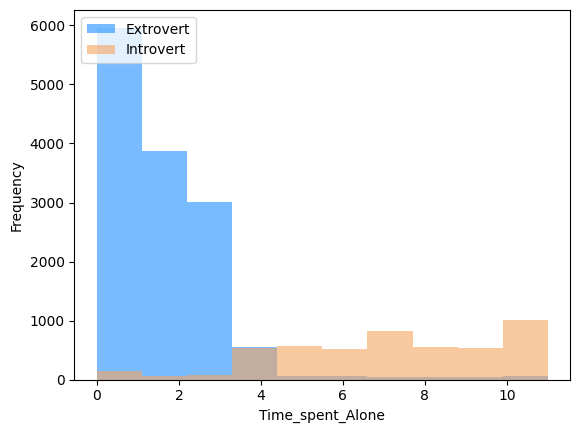

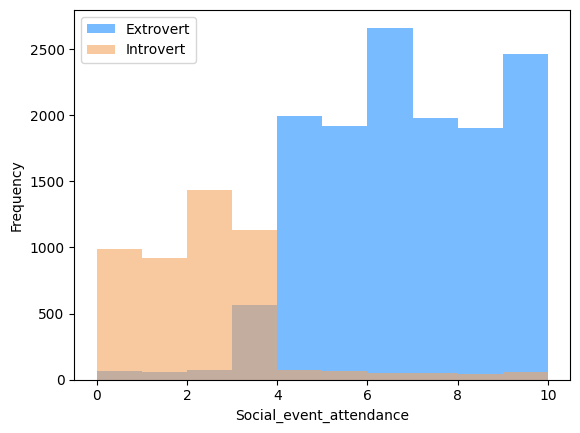

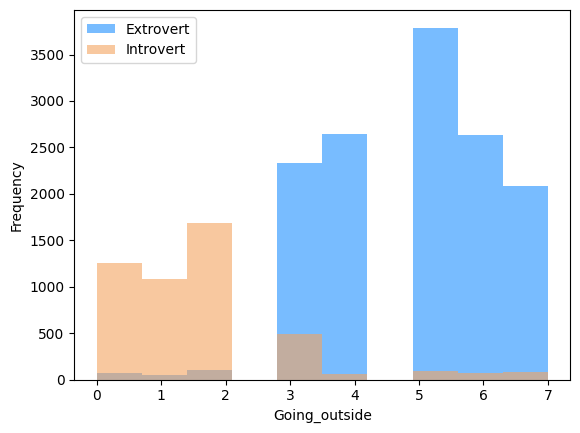

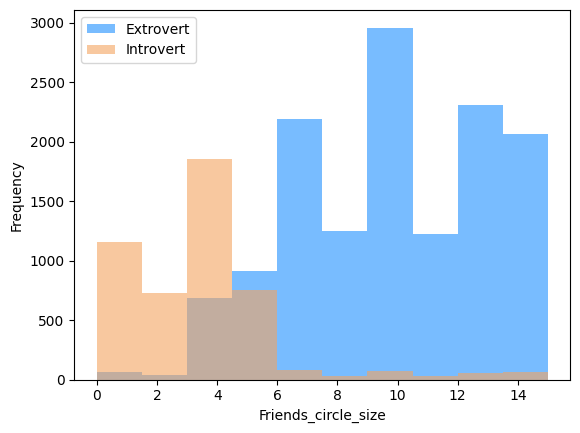

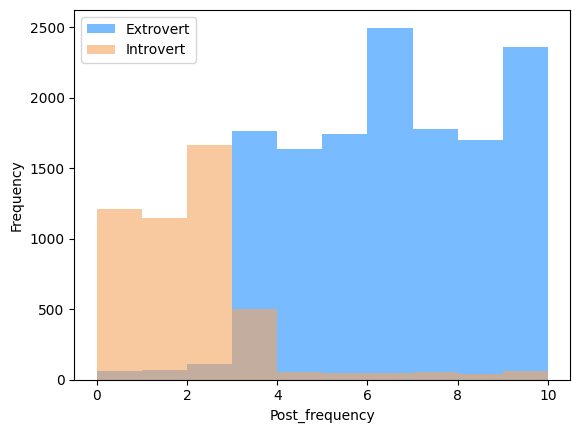

In [16]:
for col in target_cols:
  plt.hist(df[df['Personality']=="Extrovert"][col],color='dodgerblue',alpha=0.6)
  plt.hist(df[df['Personality']=="Introvert"][col],color='sandybrown',alpha=0.6)
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.legend(["Extrovert","Introvert"],loc="upper left")
  plt.show()

## Feature Engineering

In [17]:
# Change Personality value into integer
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [23]:
# Standard Scaler

In [20]:
df['Time_spent_Alone'].mean()

np.float64(3.140520405959836)

## Data Splitting

In [28]:
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.0,1
1,1,1.0,0,7.0,3.0,0,10.0,8.0,1
2,2,6.0,1,1.0,0.0,1,3.0,0.0,0
3,3,3.0,0,7.0,3.0,0,11.0,5.0,1
4,4,1.0,0,4.0,4.0,0,13.0,6.0,1


In [29]:
X=df.drop(['id','Personality'],axis=1)
y=df['Personality']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Training

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [37]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt=DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

## Model Prediction and Evaluation

In [42]:
y_pred_lr=lr.predict(X_test)
# accuracy_score(y_test,y_pred_lr)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       952
           1       0.98      0.98      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [43]:
y_pred_dt=dt.predict(X_test)
# accuracy_score(y_test,y_pred_dt)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       952
           1       0.97      0.97      0.97      2753

    accuracy                           0.95      3705
   macro avg       0.94      0.94      0.94      3705
weighted avg       0.96      0.95      0.96      3705



In [48]:
y_pred_rf=rf.predict(X_test)
# accuracy_score(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       952
           1       0.98      0.99      0.98      2753

    accuracy                           0.97      3705
   macro avg       0.97      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [52]:
# Here as seen in Classification report, Random Forest has better result

## Predict Value

In [115]:
df_test=pd.read_csv('test.csv')

In [116]:
df_test['Stage_fear']=df_test['Stage_fear'].map({'No':0,'Yes':1})
df_test['Drained_after_socializing']=df_test['Drained_after_socializing'].map({'No':0,'Yes':1})

In [121]:
df_test['Time_spent_Alone']=df_test['Time_spent_Alone'].fillna(df_test['Time_spent_Alone'].mean().round())
df_test['Stage_fear']=df_test['Stage_fear'].fillna(df_test['Stage_fear'].mode())
df_test['Social_event_attendance']=df_test['Social_event_attendance'].fillna(df_test['Social_event_attendance'].mean())
df_test['Going_outside']=df_test['Going_outside'].fillna(df_test['Going_outside'].mean())
df_test['Drained_after_socializing']=df_test['Drained_after_socializing'].fillna(df_test['Drained_after_socializing'].mode())
df_test['Friends_circle_size']=df_test['Friends_circle_size'].fillna(df_test['Friends_circle_size'].mean())
df_test['Post_frequency']=df_test['Post_frequency'].fillna(df_test['Post_frequency'].mean().round())

In [123]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6175 non-null   int64  
 1   Time_spent_Alone           6175 non-null   float64
 2   Stage_fear                 5577 non-null   float64
 3   Social_event_attendance    6175 non-null   float64
 4   Going_outside              6175 non-null   float64
 5   Drained_after_socializing  5743 non-null   float64
 6   Friends_circle_size        6175 non-null   float64
 7   Post_frequency             6175 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 386.1 KB


In [124]:
X_test_pred=df_test.drop(['id'],axis=1)

In [135]:
y_pred=rf.predict(X_test_pred)

In [136]:
submission=pd.DataFrame({'id':df_test['id'],'Personality':y_pred})

In [137]:
submission['Personality']=submission['Personality'].map({0:'Introvert',1:'Extrovert'})

In [140]:
submission.to_csv('submission.csv',index=False)